In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="../css/custom.css">

# Build your first convolutional neural network with Keras

![keras center third](../images/keras_basics/keras.png)
![footer_logo](../images/logo.png)

## Goal
The goal of this notebook is to let you build your first convolutional neural network. The example we will be working with is digit classification. Use layers such as convolutions, pooling, dropout and batch normalization for image recognition. 

## Program

- [The MNIST Dataset]()
- [Data Preprocessing]()
- [Building the model]()
- [Training and evaluating the model]()

In [2]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

np.random.seed(707)

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = 15, 6

---
## MNIST 

Like many other libraries, such as scikit-learn, `keras` includes some standard datasets to play around with. Let's load the MNIST dataset and explore what it contains: 

In [10]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

Later, when you have read this Notebook and made sense of the model, try loading the CIFAR10 dataset:

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

Some summary statistics on data size, type and range:

In [11]:
print(
    f"Train:\tX shape:{X_train.shape}\tY shape:{y_train.shape}\tType (X, y): ({X_train.dtype}, {y_train.dtype})\tX values (max, min): ({X_train.min()}, {X_train.max()})"
)
print(
    f"Test:\tX shape:{X_test.shape}\tY shape:{y_test.shape}\tType (X, y): ({X_test.dtype}, {y_test.dtype})\tX values (max, min): ({X_test.min()}, {X_test.max()})"
)

Train:	X shape:(60000, 28, 28)	Y shape:(60000,)	Type (X, y): (uint8, uint8)	X values (max, min): (0, 255)
Test:	X shape:(10000, 28, 28)	Y shape:(10000,)	Type (X, y): (uint8, uint8)	X values (max, min): (0, 255)


Show some example images:

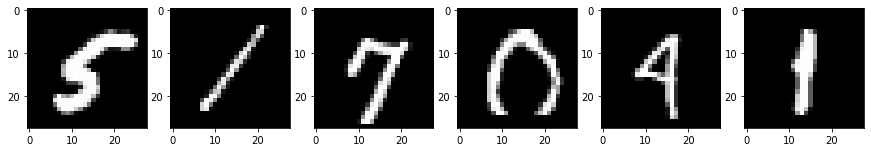

In [12]:
[ax.imshow(random.choice(X_train), cmap="gray") for ax in plt.subplots(1, 6)[1]] 

In [15]:
X_train[0].shape

(28, 28)

In [19]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

 a (28, 28) image is a picture of 9

vector of length 10
[a,s,d,f,g,h,j,k,u,y]

In [ ]:
softmax ensures values add to 1
[0,0,0,0,0,0,0,0,0.1,0.9]

In [ ]:
target vector (length 10)
[0,0,0,0,0,0,0,0,0,1]

In [18]:
y_train[0]

5

### <mark>Exercise: Dataset summary
>
> - How many training examples do we have?
> - How many color channels does each picture have?
> - What will the input size to the Deep Neural Network (DNN) be?
> - What will the output size of the DNN be? 

## Data Preprocessing

We have to do some preprocessing on our data:

- Rescale pixel values between 0 and 1
- Input type should be float
- There are 10 classes so in order to compute the cross entropy loss function we need to one-hot encoded vectors.

In [20]:
if len(X_train.shape) != 4:
    X_train = np.expand_dims(X_train, axis=3)
if len(X_test.shape) != 4:
    X_test = np.expand_dims(X_test, axis=3)

X_train, X_test = X_train.astype("float") / 255, X_test.astype("float") / 255
y_train_onehot, y_test_onehot = to_categorical(y_train), to_categorical(y_test)


Check the resulting dimensions and types:

In [21]:
print(
    f"Train:\tX shape:{X_train.shape}\tY shape:{y_train_onehot.shape}\tType (X, y): ({X_train.dtype}, {y_train_onehot.dtype})\tX values (min, max): ({X_train.min()}, {X_train.max()})"
)
print(
    f"Test:\tX shape:{X_test.shape}\tY shape:{y_test_onehot.shape}\tType (X, y): ({X_test.dtype}, {y_test_onehot.dtype})\tX values (min, max): ({X_test.min()}, {X_test.max()})"
)

Train:	X shape:(60000, 28, 28, 1)	Y shape:(60000, 10)	Type (X, y): (float64, float32)	X values (min, max): (0.0, 1.0)
Test:	X shape:(10000, 28, 28, 1)	Y shape:(10000, 10)	Type (X, y): (float64, float32)	X values (min, max): (0.0, 1.0)


In [22]:
y_test[0]

7

In [23]:
y_test_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### <mark>Exercise: Model input & output
> - Are the input and output sizes correct from what you thought?
> - What does the fourth dimension of X represent?

---
## Model

Now that we have our data prepared, we can start building a model.
We will use some new layers for our model.

### <mark> Exercise: Model construction

Construct a model with the instructions:
 
> - inputs are normalized using `BatchNormalization` followed by a `Dropout` layer with a rate of 0.3
>   - specify the right input_shape for `BatchNormalization`
> - then add a [2D convolutional layer](https://keras.io/layers/convolutional/) with a kernel of 3x3
>   - also use `'same'` as `padding`, `32` `filters`, and `relu` as `activation`
> - output from the convolutional layer goes through a [`MaxPooling` layer](https://keras.io/layers/pooling/)
> - then `Flatten` the output and add a `Dropout` layer with a rate of 0.3
> - connect the output to a `Dense` layer with the right amount of `units` for our classification problem
> - followed by a `BatchNormalization` and `relu` activation function
> - then a `DropoutLayer`
> - and finally connect to the output layer with an `softmax` activation function

Don't forget to:
> - use the `relu` activation function or others
> - use `Dropout` layers

In [ ]:
# NBVAL_RAISES_EXCEPTION
def make_cnn_model():
    model = Sequential()
    # input layer transformation (BatchNormalization + Dropout)

    # convolutional layer (Conv2D + MaxPooling2D + Flatten + Dropout)

    # fully connected layer (Dense + BatchNormalization + Activation + Dropout)

    # output layer (Dense + BatchNormalization + Activation)

    return model


model = make_cnn_model()
model.summary()

In [26]:
help(layers.Conv2D)

Help on class Conv2D in module keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`. You can use `None` when
 |  a dimension has variable size.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
 |  >>> # size is 4.
 |  >>> input_shape = (4, 28, 28, 3)
 |  >>> x = tf.random.normal(input_shap

In [29]:
# %load ../answers/keras_basics_cnn.py
from tensorflow.keras import layers


def make_cnn_model():
    model = Sequential()
    # input layer transformation (BatchNormalization + Dropout)
    model.add(layers.BatchNormalization(input_shape=(28, 28, 1)))
    model.add(layers.Dropout(rate=0.3))

    # convolutional layer (Conv2D + MaxPooling2D + Flatten + Dropout)
    model.add(
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same")
    )
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dropout(rate=0.3))

    # fully connected layer (Dense + BatchNormalization + Activation + Dropout)
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(rate=0.3))

    # output layer (Dense + BatchNormalization + Activation)
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("softmax"))

    return model


model = make_cnn_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dropout_7 (Dropout)         (None, 6272)             

In [ ]:
(28, 28, 1) image

In [ ]:
32 filters, 3x3 kernel

In [ ]:
320 paramters

In [ ]:
320 = 32 * 10

Learning 32 filters, each have 10 paramters associated with them.

10 parameters = 9 from the kernel (3 x 3) + 1 bias

In [28]:
32 * 9

288

### <mark>Question:
> can you explain where are the number of parameters for each layer coming from?

## Training and evaluating the model

Train the model and make sure your accuracy reaches 88%:

In [35]:
model = make_cnn_model()
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(
    X_train,
    y_train_onehot,
    batch_size=5000,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
10/10 [==============================] - 9s 832ms/step - loss: 1.2522 - accuracy: 0.6842 - val_loss: 1.4895 - val_accuracy: 0.7682
Epoch 2/10
10/10 [==============================] - 8s 824ms/step - loss: 0.8263 - accuracy: 0.8595 - val_loss: 1.3653 - val_accuracy: 0.8828
Epoch 3/10
10/10 [==============================] - 8s 825ms/step - loss: 0.7491 - accuracy: 0.8810 - val_loss: 1.3159 - val_accuracy: 0.9146
Epoch 4/10
10/10 [==============================] - 8s 816ms/step - loss: 0.7007 - accuracy: 0.8956 - val_loss: 1.3018 - val_accuracy: 0.9202
Epoch 5/10
10/10 [==============================] - 8s 819ms/step - loss: 0.6616 - accuracy: 0.9056 - val_loss: 1.3504 - val_accuracy: 0.8882
Epoch 6/10
10/10 [==============================] - 8s 818ms/step - loss: 0.6254 - accuracy: 0.9164 - val_loss: 1.4550 - val_accuracy: 0.7922
Epoch 7/10
10/10 [==============================] - 8s 814ms/step - loss: 0.5951 - accuracy: 0.9237 - val_loss: 1.5965 - val_accuracy: 0.6273
Epoch 

In [36]:
score = model.evaluate(X_test, y_test_onehot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.004957437515259
Test accuracy: 0.148499995470047


In [37]:
y_hat_onehot = model.predict(X_test)
y_hat = np.argmax(y_hat_onehot, axis=1).astype(np.int16)
y_hat

array([7, 1, 1, ..., 1, 5, 1], dtype=int16)

In [38]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

labels=[0,1,2,3,4,5,6,7,8,9]


confusion_df = pd.DataFrame(confusion_matrix(y_test, y_hat, labels=labels), 
                            columns=["Prediction " + str(label) for label in labels], 
                            index=["True " + str(label) for label in labels])
confusion_df

,Prediction 0,Prediction 1,Prediction 2,Prediction 3,Prediction 4,Prediction 5,Prediction 6,Prediction 7,Prediction 8,Prediction 9
True 0,1,979,0,0,0,0,0,0,0,0
True 1,0,1135,0,0,0,0,0,0,0,0
True 2,0,1030,0,0,1,0,0,1,0,0
True 3,0,1009,0,0,0,0,0,1,0,0
True 4,0,925,0,0,57,0,0,0,0,0
True 5,0,759,0,0,0,133,0,0,0,0
True 6,0,958,0,0,0,0,0,0,0,0
True 7,0,869,0,0,0,0,0,159,0,0
True 8,0,973,0,0,0,1,0,0,0,0
True 9,0,1009,0,0,0,0,0,0,0,0


In [34]:
print(multilabel_confusion_matrix(y_test, y_hat, labels=labels))

[[[8966   54]
  [  19  961]]

 [[8708  157]
  [   9 1126]]

 [[8922   46]
  [ 123  909]]

 [[8891   99]
  [  82  928]]

 [[8959   59]
  [  92  890]]

 [[9029   79]
  [  85  807]]

 [[8987   55]
  [  40  918]]

 [[8858  114]
  [  87  941]]

 [[8994   32]
  [ 185  789]]

 [[8866  125]
  [  98  911]]]


### <mark>Questions: layers

> - You've used layers like the convolutional and max-pooling layers. Can you explain what every layer does?
> - What is the difference betwen max-pooling and average-pooling?
> - What does batch normalization do? Why should it happen before the activation function?
> - What is a drop out layer?

---
## Summary

In this exercise, we've used a convolution neural network to classify images.
Layers like `Conv2D`, `MaxPooling2D` and `Flatten` are the building blocks for any networks working on images.